# Imports

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.0 MB/s 


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib as plt
import random as rd
import time
import os
import openpyxl
import xlsxwriter

# Data read

In [ ]:
writer1= pd.ExcelWriter('constructivo.xlsx',engine='xlsxwriter')
writer2= pd.ExcelWriter('GRASP.xlsx',engine='xlsxwriter')
writer3 = pd.ExcelWriter('ruido.xlsx',engine='xlsxwriter')
k=3
s= zipfile.ZipFile('pmedcap.zip','r')
Zipfile = ('pmedcap.zip','r')
with s as zipObj:
  listOfiles = zipObj.namelist()
  print(listOfiles)
  for elem in listOfiles:
    txtdata = s.extract(elem)
    listN = []
    with open(txtdata) as f:
      lines = f.readline()
      print(lines)
      list1 = list(lines.split("\t"))
      print(list1)
      lista = list(list1[0:2])
      print(lista)
      results = [int(i) for i in lista]
      while lines:
        lines = f.readline()
        if lines == "":
          break
        else:
          list1 = list(lines.split("\t"))
          lista = [int(i) for i in list1]
          lista = np.array(lista)
          listN.append(lista)

    listNodos = np.array(listN.copy())
    numNodos = results[0]
    numPmedians = results[1]
    g = grasp(listNodos, numPmedians, numNodos)
    c= constructivo1(listNodos,numPmedians,numNodos)
    r = ruido1(listNodos,numPmedians,numNodos)
    print(elem)
    c.to_excel(writer1,sheet_name=elem)
    g.to_excel(writer2, sheet_name = elem)
    r.to_excel(writer3, sheet_name = elem)

writer1.save()
writer2.save()
writer3.save()



['pmedcap1.txt', 'pmedcap11.txt', 'pmedcap12.txt', 'pmedcap13.txt', 'pmedcap14.txt', 'pmedcap15.txt', 'pmedcap2.txt', 'pmedcap3.txt', 'pmedcap4.txt', 'pmedcap5.txt', 'pmedcap6.txt', 'pmedcap7.txt', 'pmedcap8.txt', 'pmedcap9.txt']
50	5		

['50', '5', '', '\n']
['50', '5']
pmedcap1.txt
3038	1000		

['3038', '1000', '', '\n']
['3038', '1000']
pmedcap11.txt
3038	900		

['3038', '900', '', '\n']
['3038', '900']
pmedcap12.txt
3038	800		

['3038', '800', '', '\n']
['3038', '800']
pmedcap13.txt
3038	700		

['3038', '700', '', '\n']
['3038', '700']
pmedcap14.txt
3038	600		

['3038', '600', '', '\n']
['3038', '600']
pmedcap15.txt
50	5		

['50', '5', '', '\n']
['50', '5']
pmedcap2.txt
100	10		

['100', '10', '', '\n']
['100', '10']
pmedcap3.txt
100	10		

['100', '10', '', '\n']
['100', '10']
pmedcap4.txt
100	10		

['100', '10', '', '\n']
['100', '10']
pmedcap5.txt
200	15		

['200', '15', '', '\n']
['200', '15']
pmedcap6.txt
300	25		

['300', '25', '', '\n']
['300', '25']
pmedcap7.txt
300	30		

['

# Graficamos

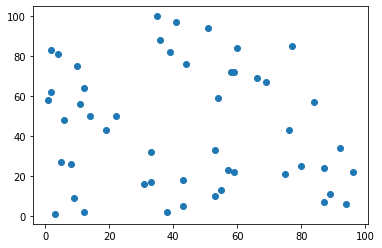

In [ ]:
plt.pyplot.scatter(listNodos[:,0], listNodos[:, 1])

# Constructivo eliminación




Si la funcion objetivo a optimizar fuera minimizar la distancia total recorrida por los usuarios y los usuarios de un posible nodo pueden repartirse entre varias otras medianas se propone el siguiente algoritmo
min Z = sum(dist_i) refiriendose a la distancia recorrida por cada usuario que tambien se podria representar min Z = sum(dist_j * personas_j) que es la suma de distancia de cada nodo eliminado por la cantidad de personas que tienen que recorrer esa distancia

In [ ]:
#elimination process
aux = listNodos.copy()
for i in range(numNodos - numPmedians ):
  leastFav = np.where(aux[:, 3] == np.amin(aux[:,3]))
  desList = []
  closeNodes = []
  for j in leastFav[0]:
    listDist = []
    for n in range(aux[:, 0].size):
      dist = distancia(aux[n,0],aux[j,0], aux[n,1], aux[j,1] )
      listDist.append(dist)
    listDis = np.array(listDist)
    minDist = np.amin(listDis[np.nonzero(listDis)])
    desList.append(minDist)
    closerNode = np.where(listDis == minDist)[0][0]
    closeNodes.append(closerNode)
  desList1 = np.array(desList.copy())
  leastFav = np.array(leastFav)
  eliminated = leastFav[0][np.where(desList1 == np.amax(desList1))[0][0]]
  closest = closeNodes[np.where(desList1 == np.amax(desList1))[0][0]]
  aux[closest, 3] += aux[eliminated, 3]
  #print(eliminated)
  aux = np.delete(aux.copy(), eliminated, axis=0)
#print(np.sum(aux[:, 3]))

#correcting for capacity
listChosen = []
for a in range(aux[:,0].size):

  if aux[a,3] > aux[a,2]:
    dif = aux[a,3] - aux[a,2]
    listDist = []
    indexes = []
    sortedDists = []
    for m in range(aux[:,0].size):
      distance = distancia(aux[a,0], aux[m,0], aux[a,1], aux[m,1] )
      listDist.append(distance)
      indexes.append(m)
    sortedDists.append(indexes)
    sortedDists.append(listDist)
    sortedDists = np.array(sortedDists.copy())
    sortedArr = sortedDists[ :, sortedDists[1].argsort()]
    for m in range(aux[:,0].size-1):
      c1 = int(sortedArr[0, m+1])
      if aux[c1, 2] > aux[c1, 3]:
        dif1 = aux[c1, 2] - aux[c1, 3]
        aux[c1, 3] += min(dif1, dif)
        aux[a,3] -= min(dif1,dif)
        dif = dif - dif1 
        if dif <= 0:
          break 

  vector1 = listNodos[:, 0]
  vector2 = listNodos[:, 1]
  b1 = np.where(vector1 == aux[a, 0])[0]
  b2 = np.where(vector2 == aux[a, 1])[0]
  listChosen.append(np.intersect1d(b1, b2)[0])
print(listChosen)
  
  #print(aux[a, 3])
#print(sum(aux[:, 3]))
#print(np.intersect1d(b1, b2)[0])





KeyboardInterrupt: ignored

# Constructivo ahorros

Si la funcion objetivo es unicamente seleccionar las medianas que menor distancia tengan a los nodos se propone el algoritmo de los ahorros (tomando en cuenta que no )

In [ ]:
def constructivo1(listNodos, numPmedians, numNodos) : 
  start_time = time.time()
  m = 1000000000000 
  aux1 = listNodos.copy()
  aux5 = listNodos.copy()
  possibles = []
  listDistances = np.zeros([numNodos, numNodos])
  jointed = np.zeros((numNodos, numNodos))

  for i in range(numNodos):
    listDistance = np.zeros(numNodos)
    for n in range( numNodos):
      distance = distancia(aux1[i, 0], aux1[n, 0], aux1[i, 1], aux1[n, 1]) 
      listDistance[n] = distance
    listDistances[i] += listDistance

  sumDist = sum(listDistances)
  sortedDistances = sorted(range(len(sumDist)), key = lambda k: sumDist[k])
  for i in range(numPmedians):
    possibles.append(sortedDistances[i])


  listDistances = np.array(listDistances)
  minDist = np.amin(listDistances[np.nonzero(listDistances)])
  minDistIndex = np.where(listDistances == minDist)
  arr1 = np.array([minDistIndex[0][0], minDistIndex[1][0]])

  ayuda = list(map(lambda el:[el], possibles.copy()))
  ayuda1 = np.array(possibles.copy())
  for j in range(numNodos):
    array = listDistances[:,j]
    sort = sorted(range(len(array)), key = lambda k: array[k])
    for v in sort:
          if aux5[v, 2] > aux5[v, 3] + aux5[j, 3] and v in ayuda1:
            addTo = np.where(ayuda1 == v)[0][0]
            aux5[v, 3] += aux5[j, 3]
            ayuda[addTo].append(j)
            break

  fo = np.zeros(len(possibles))
  ayuda1 = np.array(possibles.copy())
  for y in possibles:
    ayu = np.where(ayuda1 == y)
    added = 0
    for x in ayuda[ayu[0][0]]:
      added += listDistances[y, x]
    fo[ayu[0][0]] += added
  sumaTotal = sum(fo)

  for y in range(len(fo)):
    ayuda[y].append(fo[y])
  ultimaFila = [sumaTotal, time.time() - start_time ]
  possibles.append(ayuda)
  possibles.append(ultimaFila)
  dfpossibles= pd.DataFrame(possibles)
  return dfpossibles



  


# True

In [ ]:
def constructivo(listNodos, numPmedians, numNodos): 
  start_time = time.time()
  aux2 = listNodos.copy()
  aux4 = listNodos.copy()
  possibles = list(range(0,numNodos))
  listDistances = np.zeros([numNodos, numNodos])
  eliminated = []


  for i in range(numNodos):
    listDistance = np.zeros(numNodos)
    for n in range(numNodos):
      distance = distancia(aux2[i, 0], aux2[n, 0], aux2[i, 1], aux2[n, 1]) 
      listDistance[n] = distance
    listDistances[i] += listDistance
  listDistances = np.array(listDistances) 


  auxiliary = np.zeros(numNodos)
  for ñ in range(numNodos-numPmedians + 1):
    jointed = auxiliary.copy()
    ayuda = list(map(lambda el:[el], possibles.copy()))


    for j in range(numNodos ):
      arrr = listDistances[:,j]
      minimo = np.amin(arrr[np.nonzero(arrr)])
      indice = np.where(arrr == minimo)[0][0]
      jointed[indice] += 1
      if len(possibles) == numPmedians and not j in possibles:
        ayuda1 = np.array(possibles.copy())
        if aux4[indice,2] >= aux4[indice,3] + aux4[j, 3]:
          addTo = np.where(ayuda1 == indice)[0][0]
          ayuda[addTo].append(j)
          aux4[indice, 3] += aux4[j, 3]
        else:
          arrr5 = listDistances[:, j].copy()
          rank1 = sorted(range(len(arrr5)), key = lambda k: arrr5[k])
          for v in rank1:
            if aux4[v, 2] > aux4[v, 3] + aux4[j, 3] and v in ayuda1:
              addTo = np.where(ayuda1 == v)[0][0]
              aux4[v, 3] += aux4[j, 3]
              ayuda[addTo].append(j)
              break

          


    if len(possibles) == numPmedians:
      fo = np.zeros(len(possibles))
      ayuda1 = np.array(possibles.copy())
      for y in possibles:
        ayu = np.where(ayuda1 == y)
        added = 0
        for x in ayuda[ayu[0][0]]:
          added += listDistances[y, x]
        fo[ayu[0][0]] += added


    poop = np.where(jointed == np.amin(jointed[jointed > -1]))[0]
    if poop.size > 1:
      sumas = np.zeros(poop.size)
      for t in poop:
        shala = np.where(poop == t)
        sumatron = sum(listDistances[:,t])  
        sumas[shala[0][0]] = sumatron
      shit = np.amax(sumas)
      shala1 = np.where(sumas == shit)[0][0]
      worse = poop[shala1]
      arrr1 = listDistances[:, worse].copy()
      rank = sorted(range(len(arrr1)), key = lambda k: arrr1[k])


      for h in rank:
        if aux2[h, 2] > aux2[h, 3] + aux2[worse, 3]:
          aux2[h, 3] += aux2[worse, 3]
          possibles.remove(worse)
          eliminated.append(worse)
          listDistances[h,:] += 10000000000000
          auxiliary[worse] -= 1
          break


    else:

      worse = poop[0]
      arrr1 = listDistances[:, worse].copy()
      rank = sorted(range(len(arrr1)), key = lambda k: arrr1[k])
      for h in rank:
        if aux2[h, 2] > aux2[h, 3] + aux2[worse, 3]:
          aux2[h, 3] += aux2[worse, 3]
          possibles.remove(worse)
          eliminated.append(worse)
          listDistances[h,:] += 10000000000000
          auxiliary[worse] -= 1
          break
  chosen = []
  for h in range(len(possibles) + 1):
    t = ayuda[h][0]
    cap = aux4[t,2]
    dem = aux4[t,3]
    chosen.append(t)
  sumaFaltantes = sum(listNodos.copy()[:,3])

  for y in range(len(fo)):
    ayuda[y].append(fo[y])
  total = sum(fo)
  ultimaFila = [total, time.time() - start_time]

  possibles.append(ayuda)
  possibles.append(ultimaFila)
  dfpossibles= pd.DataFrame(possibles)
  return dfpossibles





# GRASP

In [ ]:
def grasp(listNodos, numPmedians, numNodos) : 
  start_time = time.time()
  aux1 = listNodos.copy()
  listDistances1 = np.zeros([numNodos, numNodos])
  mejorTotal = 10000000000000000000000000000000
  mejorFo = []
  mejorAgregados = []
  for i in range(numNodos):
    listDistance = np.zeros(numNodos)
    for n in range(numNodos):
      distance = distancia(aux1[i, 0], aux1[n, 0], aux1[i, 1], aux1[n, 1]) 
      listDistance[n] = distance
    listDistances1[i] += listDistance
  listDistances1 = np.array(listDistances1) 
  for n in range(200):
    aux1 = listNodos.copy()
    randomlist = rd.sample(range(0, numNodos), numPmedians)
    rdlist = np.array(randomlist.copy())
    añadidos = list(map(lambda el:[el], randomlist.copy()))
    listDist = np.zeros((numNodos, numPmedians))
    fo = np.zeros(numPmedians)
    eliminados = randomlist.copy()

    for l in randomlist:
      indice1 = np.where(rdlist == l)[0][0]
      listDist[:, indice1] += listDistances1[:, l]

    for j in range(numNodos):
      arrr = listDist[j,:]
      minimo = np.amin(arrr[np.nonzero(arrr)])
      indice = np.where(arrr == minimo)[0][0]
      indice1 = rdlist[indice]
      if not j in eliminados:
        if aux1[indice1,2] > aux1[indice1, 3] + aux1[j, 3]:  
          añadidos[indice].append(j)
          aux1[indice1, 3] += aux1[j, 3]
        else:
          ranked = sorted(range(len(arrr)), key = lambda k: arrr[k])
          ranked1 = rdlist[ranked]
          for r in ranked1:
            if aux1[r,2] > aux1[r, 3] + aux1[j, 3]:
              u = np.where(ranked1 == r)[0][0]
              añadidos[u].append(j)
              aux1[r,3] += aux1[j,3]
              break
        eliminados.append(j)


    for y in rdlist:
      ayu1 = np.where(rdlist == y)
      added1 = 0
      for x in añadidos[ayu1[0][0]]:
        added1 += listDistances1[y, x]
      fo[ayu1[0][0]] += added1
    sumam = sum(fo)

    if sumam < mejorTotal:
      mejorTotal = sumam
      mejorAgregados = añadidos.copy()
      mejorFo = fo
      mejoresNodos = randomlist

  for y in range(len(mejorFo)):
    mejorAgregados[y].append(mejorFo[y])

  total = sum(mejorFo)
  ultimaFila = [total, time.time() - start_time]
  mejoresNodos.append(mejorAgregados)
  mejoresNodos.append(ultimaFila)
  dfpossibles= pd.DataFrame(mejoresNodos)
  return dfpossibles









  

# Ruido

In [ ]:
def ruido (listNodos, numPmedians, numNodos):
  #Agregamos ruido a los datos iniciales por medio de una distribucion uniforme
  start_time = time.time()
  auxRuido = listNodos.copy()
  xPosition = auxRuido[:, 0]
  yPosition = auxRuido[:, 1]
  extremes1 = np.amin(xPosition)
  extremes2 = np.amin(yPosition)
  noiseX = [rd.randrange(-extremes1, extremes1, 1) for i in range(numNodos)]
  noiseY = [rd.randrange(-extremes2, extremes2, 1) for i in range(numNodos)]
  xPosition += noiseX
  yPosition += noiseY
  auxRuido[:,0] = xPosition 
  auxRuido[:,1] = yPosition

  #Hacemos nuestra eleccion basada en los datos modificados

  possibles = list(range(0,numNodos))
  listDistances = np.zeros([numNodos, numNodos])
  aux2 = listNodos.copy()
  aux4 = listNodos.copy()
  eliminated = []

  for i in range(numNodos):
    listDistance = np.zeros(numNodos)
    for n in range(numNodos):
      distance = distancia(auxRuido[i, 0], auxRuido[n, 0], auxRuido[i, 1], auxRuido[n, 1]) 
      listDistance[n] = distance
    listDistances[i] += listDistance
  listDistances = np.array(listDistances) 



  auxiliary = np.zeros(numNodos)
  for ñ in range(numNodos-numPmedians + 1):
    jointed = auxiliary.copy()
    ayuda = list(map(lambda el:[el], possibles.copy()))


    for j in range(numNodos ):
      arrr = listDistances[:,j]
      minimo = np.amin(arrr[np.nonzero(arrr)])
      indice = np.where(arrr == minimo)[0][0]
      jointed[indice] += 1
      if len(possibles) == numPmedians and not j in possibles:
        ayuda1 = np.array(possibles.copy())
        if aux4[indice,2] >= aux4[indice,3] + aux4[j, 3]:
          addTo = np.where(ayuda1 == indice)[0][0]
          ayuda[addTo].append(j)
          aux4[indice, 3] += aux4[j, 3]
        else:
          arrr5 = listDistances[:, j].copy()
          rank1 = sorted(range(len(arrr5)), key = lambda k: arrr5[k])
          for v in rank1:
            if aux4[v, 2] > aux4[v, 3] + aux4[j, 3] and v in ayuda1:
              addTo = np.where(ayuda1 == v)[0][0]
              aux4[v, 3] += aux4[j, 3]
              ayuda[addTo].append(j)
              break

          


    if len(possibles) == numPmedians:
      fo = np.zeros(len(possibles))
      ayuda1 = np.array(possibles.copy())
      for y in possibles:
        ayu = np.where(ayuda1 == y)
        added = 0
        for x in ayuda[ayu[0][0]]:
          added += listDistances[y, x]
        fo[ayu[0][0]] += added


    poop = np.where(jointed == np.amin(jointed[jointed > -1]))[0]
    if poop.size > 1:
      sumas = np.zeros(poop.size)
      for t in poop:
        shala = np.where(poop == t)
        sumatron = sum(listDistances[:,t])  
        sumas[shala[0][0]] = sumatron
      shit = np.amax(sumas)
      shala1 = np.where(sumas == shit)[0][0]
      worse = poop[shala1]
      arrr1 = listDistances[:, worse].copy()
      rank = sorted(range(len(arrr1)), key = lambda k: arrr1[k])


      for h in rank:
        if aux2[h, 2] > aux2[h, 3] + aux2[worse, 3]:
          aux2[h, 3] += aux2[worse, 3]
          possibles.remove(worse)
          eliminated.append(worse)
          listDistances[h,:] += 10000000000000
          auxiliary[worse] -= 1
          break


    else:

      worse = poop[0]
      arrr1 = listDistances[:, worse].copy()
      rank = sorted(range(len(arrr1)), key = lambda k: arrr1[k])
      for h in rank:
        if aux2[h, 2] > aux2[h, 3] + aux2[worse, 3]:
          aux2[h, 3] += aux2[worse, 3]
          possibles.remove(worse)
          eliminated.append(worse)
          listDistances[h,:] += 10000000000000
          auxiliary[worse] -= 1
          break

  for h in range(len(possibles) + 1):
    t = ayuda[h][0]
    cap = aux4[t,2]
    dem = aux4[t,3]
  sumaFaltantes = sum(listNodos.copy()[:,3])

  total = sum(fo)
  ultimaFila = [total, time.time() - start_time]

  possibles.append(ayuda)
  possibles.append(ultimaFila)
  dfpossibles= pd.DataFrame(possibles)
  return dfpossibles











In [ ]:
def ruido1 (listNodos, numPmedians, numNodos):
  k = 10
  k1 = 10
  start_time = time.time()
  auxRuido = listNodos.copy()
  xPosition = auxRuido[:, 0]
  yPosition = auxRuido[:, 1]
  extremes1 = np.amin(xPosition)
  extremes2 = np.amin(yPosition)
  noiseX = [rd.randrange(-k1, k1, 1) for i in range(numNodos)]
  noiseY = [rd.randrange(-k, k, 1) for i in range(numNodos)]
  xPosition += noiseX
  yPosition += noiseY
  auxRuido[:,0] = xPosition 
  auxRuido[:,1] = yPosition
  return constructivo1(auxRuido, numPmedians, numNodos)

# Metodos auxiliares

In [ ]:
def distancia(a1, a2, b1, b2):
  r = np.sqrt((a1-a2)**2+(b1-b2)**2)
  return r